In [1]:
# Parameters
config = {
    "notebook": "notebooks/data_explorer.ipynb",
    "data_path": "C:/Users/nico_/Desktop/ITBA/TFI/global fishing watch/dataset/trawlers.csv",
    "output_label": "trawlers",
}


In [2]:
# check if config exists
try:
    config
except NameError:
    config_exists = False
else:
    config_exists = True

# make config if it does not exist already (e.g. passed in by papermill)
if not(config_exists):
    # set up some config for the experiment run
    config = {
        "data_path" : "C:/Users/nico_/Desktop/ITBA/TFI/global fishing watch/dataset/trollers.csv",
    }
print(config)

{'notebook': 'notebooks/data_explorer.ipynb', 'data_path': 'C:/Users/nico_/Desktop/ITBA/TFI/global fishing watch/dataset/trawlers.csv', 'output_label': 'trawlers'}


In [3]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

df = pd.read_csv(config['data_path'], header="infer", sep=",",error_bad_lines=False, engine ='python')
print(df.shape)
df.head()

(4369101, 10)


,mmsi,timestamp,distance_from_shore,distance_from_port,speed,course,lat,lon,is_fishing,source
0,1.252340e+12,1.325376e+09,0.0,0.0,0.0,153.0,52.458649,4.581200,-1.0,gfw
1,1.252340e+12,1.325378e+09,0.0,0.0,0.0,153.0,52.458668,4.581167,-1.0,gfw
2,1.252340e+12,1.325379e+09,0.0,0.0,0.0,153.0,52.458633,4.581183,-1.0,gfw
3,1.252340e+12,1.325380e+09,0.0,0.0,0.0,153.0,52.458649,4.581234,-1.0,gfw
4,1.252340e+12,1.325381e+09,0.0,0.0,0.0,153.0,52.458649,4.581183,-1.0,gfw


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4369101 entries, 0 to 4369100
Data columns (total 10 columns):
 #   Column               Dtype  
---  ------               -----  
 0   mmsi                 float64
 1   timestamp            float64
 2   distance_from_shore  float64
 3   distance_from_port   float64
 4   speed                float64
 5   course               float64
 6   lat                  float64
 7   lon                  float64
 8   is_fishing           float64
 9   source               object 
dtypes: float64(9), object(1)
memory usage: 333.3+ MB
None


In [5]:
df.describe()

,mmsi,timestamp,distance_from_shore,distance_from_port,speed,course,lat,lon,is_fishing
count,4.369101e+06,4.369101e+06,4.369101e+06,4.369101e+06,4.369023e+06,4.369023e+06,4.369101e+06,4.369101e+06,4.369101e+06
mean,1.578952e+14,1.426220e+09,7.819802e+04,1.496648e+05,2.972401e+00,1.744043e+02,3.266757e+01,4.927771e+00,-9.449078e-01
std,9.494779e+13,3.876472e+07,2.040747e+05,3.279532e+05,4.105081e+00,1.154701e+02,3.837240e+01,8.127552e+01,2.844518e-01
min,1.252340e+12,1.325376e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-8.498024e+01,-1.799996e+02,-1.000000e+00
25%,7.726193e+13,1.397205e+09,0.000000e+00,2.236013e+03,0.000000e+00,6.480000e+01,3.623107e+01,-8.288531e+00,-1.000000e+00
50%,1.753874e+14,1.434811e+09,4.242537e+03,3.605462e+04,1.500000e+00,1.870000e+02,5.209994e+01,4.584417e+00,-1.000000e+00
75%,2.402260e+14,1.458922e+09,5.578393e+04,9.608094e+04,4.500000e+00,2.760000e+02,5.463578e+01,1.432063e+01,-1.000000e+00
max,2.775153e+14,1.480032e+09,3.257453e+06,1.245220e+07,1.023000e+02,5.110000e+02,8.461642e+01,1.799934e+02,1.000000e+00


In [6]:
df["is_fishing"].value_counts()

-1.000000    4191707
 0.000000     112999
 1.000000      61930
 0.666667       1639
 0.333333        760
 0.750000         34
 0.250000         32
Name: is_fishing, dtype: int64

<ipython-input-7-0d4f70fb7023>:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))


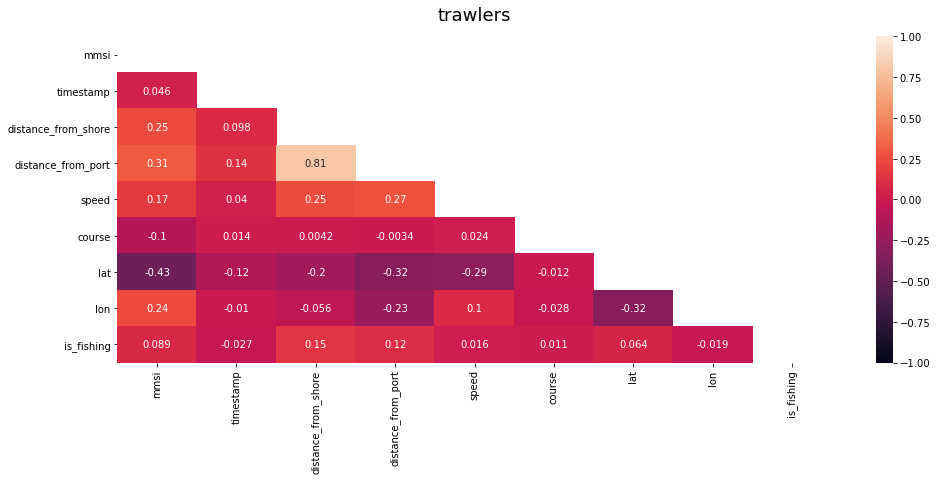

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
title = (config['data_path'].split('/')[-1]).split('.')[0]
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True)
heatmap.set_title(f'{title}', fontdict={'fontsize':18}, pad=16);

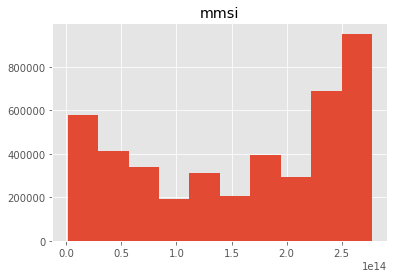

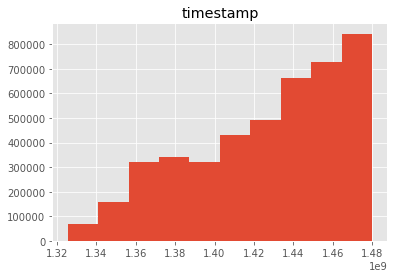

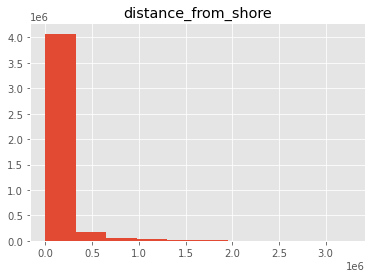

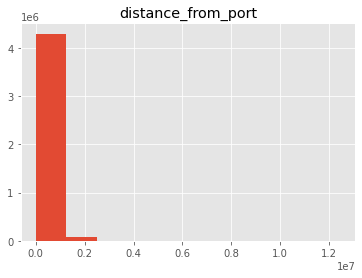

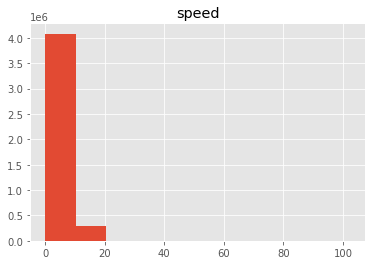

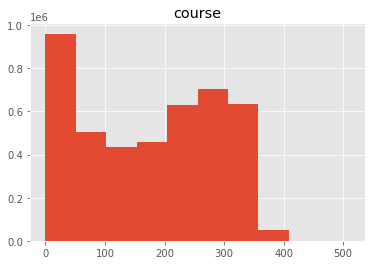

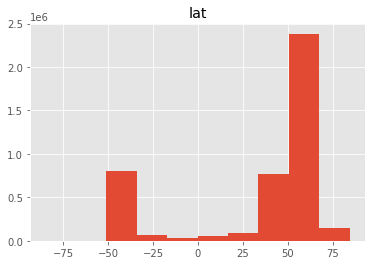

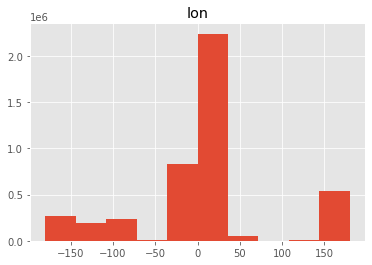

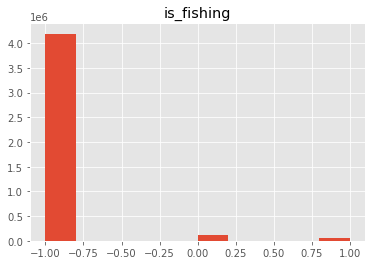

In [8]:
import matplotlib.pyplot as plt

%matplotlib inline    
plt.style.use('ggplot')

for col in df._get_numeric_data().columns:
    ax = df[col].hist()
    ax.set_title(col)
    plt.show()


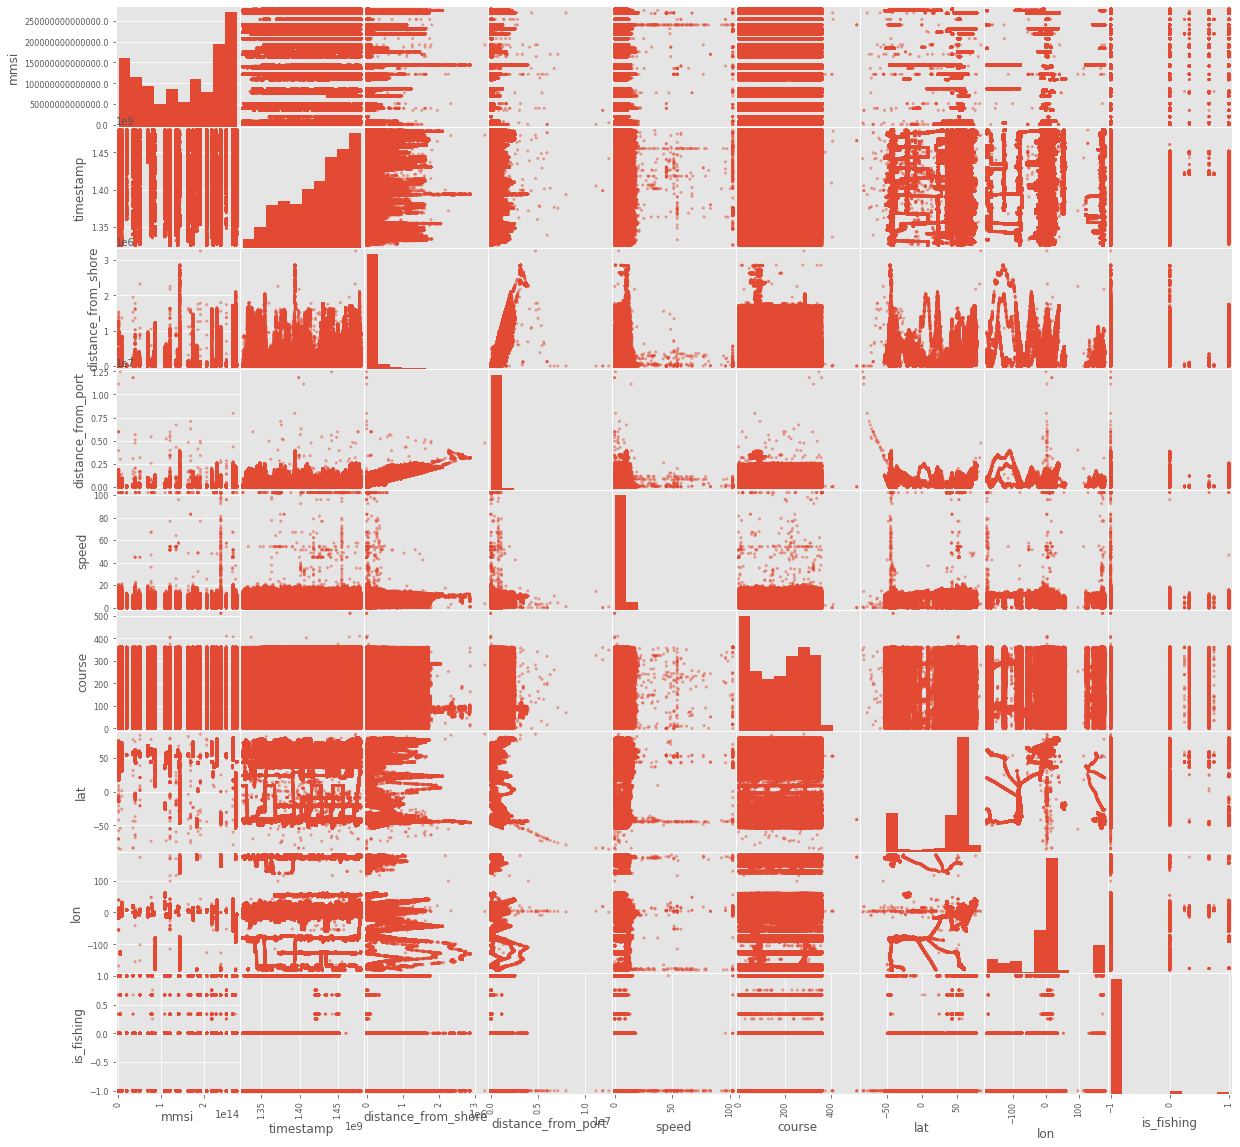

In [9]:
ax = pd.plotting.scatter_matrix(df._get_numeric_data(),figsize=(20,20))
plt.show()


In [10]:
df["is_fishing"].value_counts(normalize=True)

-1.000000    0.959398
 0.000000    0.025863
 1.000000    0.014175
 0.666667    0.000375
 0.333333    0.000174
 0.750000    0.000008
 0.250000    0.000007
Name: is_fishing, dtype: float64

¿Cual es el valor promedio de los buques que estan pescando?

In [11]:
df[df["is_fishing"] == 1].mean()

mmsi                   2.287282e+14
timestamp              1.419243e+09
distance_from_shore    3.899924e+05
distance_from_port     5.639572e+05
speed                  4.324602e+00
course                 1.753873e+02
lat                    4.698647e+01
lon                   -5.326895e+00
is_fishing             1.000000e+00
dtype: float64

In [12]:
#Nos quedamos con los puntos que estan mayor a 3 millas nauticas de la costa.
df = df[(df['distance_from_shore'] >= 5556)]

#Nos quedamos solamente con los valores que estamos seguros que esta o no esta pescando.
df = df[(df['is_fishing'] == -1.0)  | (df['is_fishing'] == 1.0) ]

#Renombramos las columnas de la variable a predecir de si esta pescando o no.
df["is_fishing"] = np.where(df["is_fishing"] == 1.0, 'SI', 'NO')

Observamos la velocidad promedio separado por cuando esta o no esta pescando.

In [13]:
columns_to_show = ["speed"]

for column in columns_to_show:
    print('#########')
    print(df.groupby(["is_fishing"])[[column]].describe(percentiles=[]))


#########
                speed                                          
                count      mean       std  min  50%         max
is_fishing                                                     
NO          2059530.0  5.544350  3.910351  0.0  4.3  102.300003
SI            58846.0  4.374573  2.580930  0.0  3.8  102.300003


In [14]:
df['mmsi'].value_counts().sort_index(ascending=False)

2.775153e+14     27460
2.748501e+14    127494
2.746838e+14     70402
2.691196e+14     48507
2.690503e+14    109219
2.684335e+14     19862
2.676099e+14     50779
2.533834e+14     45870
2.402260e+14    499236
2.311543e+14     28865
2.295613e+14      4583
2.248331e+14      2917
2.226561e+14      8339
2.189971e+14     22309
2.187965e+14     16513
2.073022e+14     42971
1.924269e+14     74937
1.867463e+14     40914
1.838128e+14     49280
1.753874e+14     33509
1.696186e+14     28492
1.641467e+14     52945
1.439069e+14      5481
1.414316e+14     18647
1.414009e+14      8674
1.397611e+14     17782
1.356584e+14     15596
1.217392e+14     11243
1.214265e+14     84832
1.163339e+14      8444
1.124532e+14      4917
1.100141e+14     16773
1.089163e+14     14550
8.681774e+13     46207
8.305062e+13     18381
8.042345e+13     21156
7.835965e+13      8641
7.726193e+13     60544
6.960986e+13      8319
5.110130e+13     42497
4.893953e+13     16222
4.083411e+13     53882
3.985941e+13     50888
3.491170e+1

In [15]:
df.groupby('mmsi')['is_fishing'].value_counts(normalize=True).unstack().sort_values(by='mmsi', ascending=False)

is_fishing,NO,SI
mmsi,,
2.775153e+14,0.982302,0.017698
2.748501e+14,0.945009,0.054991
2.746838e+14,0.997543,0.002457
2.691196e+14,0.989156,0.010844
2.690503e+14,0.811178,0.188822
2.684335e+14,0.975028,0.024972
2.676099e+14,0.975955,0.024045
2.533834e+14,0.989078,0.010922
2.402260e+14,0.997136,0.002864
